In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
d1 = pd.read_csv(r"iris.csv")
d1.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
d1.describe()
d1.shape

(150, 5)

In [7]:
d1["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Figure size 1000x500 with 0 Axes>

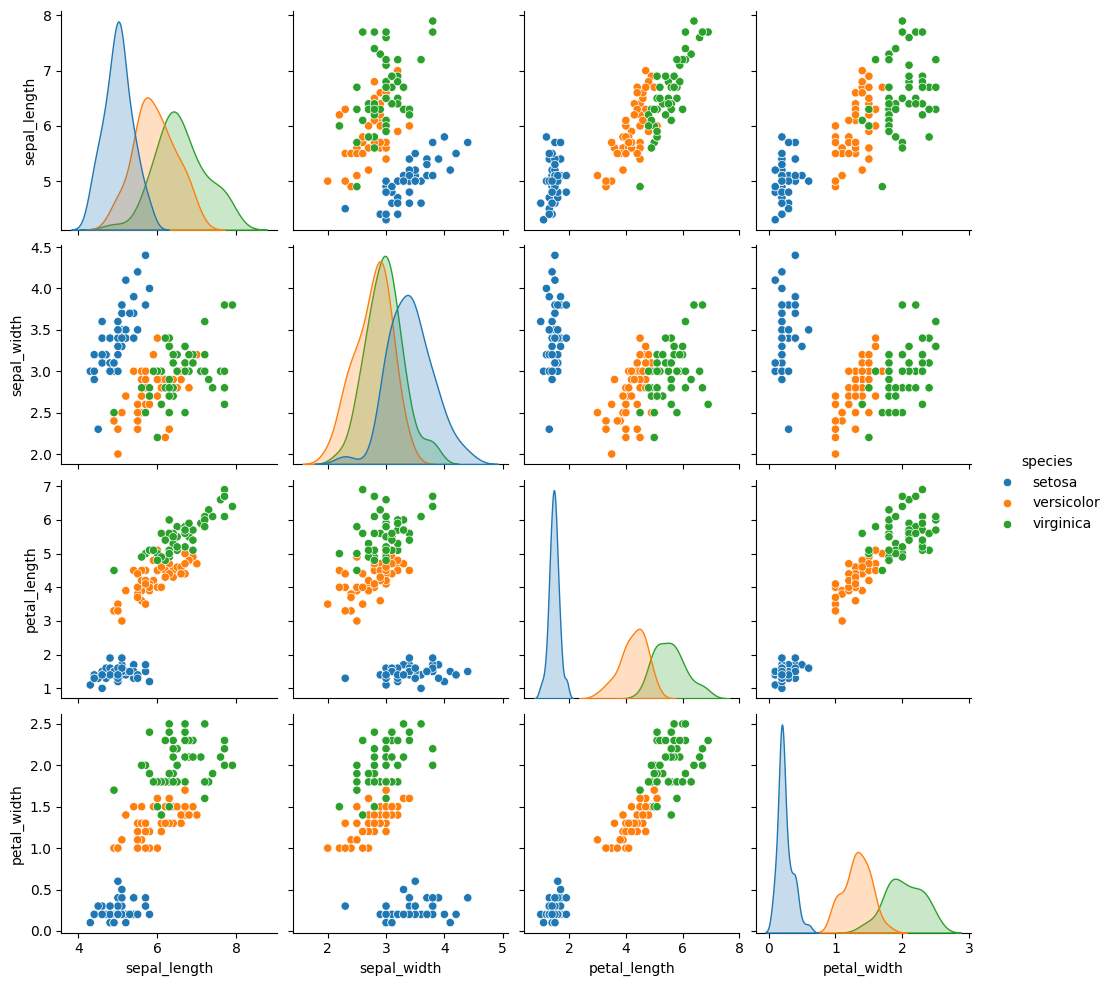

In [8]:
plt.figure(figsize=(10,5))
sns.pairplot(data=d1,hue="species")
plt.show()

In [9]:
x = d1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = d1['species']

print(len(x), len(y))  # Should print 150, 150


150 150


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(d1["species"])
d1["Encode"] = y
d1["Encode"].unique()
d1.drop(columns=["species"],inplace=True)


In [11]:
d1.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Encode
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Figure size 1000x500 with 0 Axes>

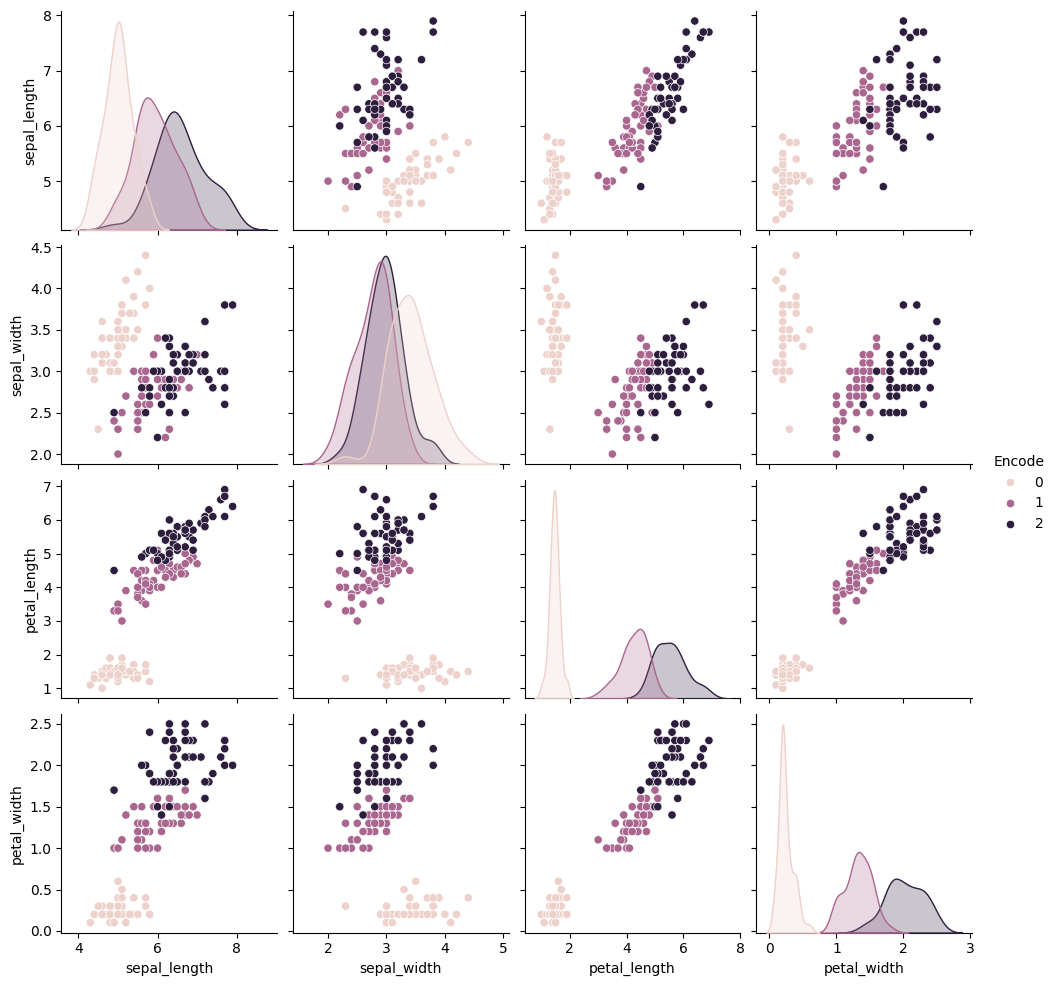

In [12]:
plt.figure(figsize=(10,5))
sns.pairplot(data=d1,hue="Encode")
plt.savefig("Iris Pairplot",dpi=300)
plt.show()

In [13]:
print(len(x), len(y))


150 150


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

***********DECISION TREE***********

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [16]:
dt.score(x_test,y_test)*100 ,dt.score(x_train,y_train)*100



(100.0, 100.0)

In [17]:
dt.predict([[5.7,2.8,4.1,1.3]]),dt.predict([[5.0,3.6,1.4,0.2]])

C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(array([1]), array([0]))

In [18]:
from sklearn.metrics import accuracy_score
predictions = dt.predict(x_test)
predictions
accuracy = accuracy_score(y_test,predictions)
print(f"Model Accuracy:{accuracy * 100}%")

Model Accuracy:100.0%


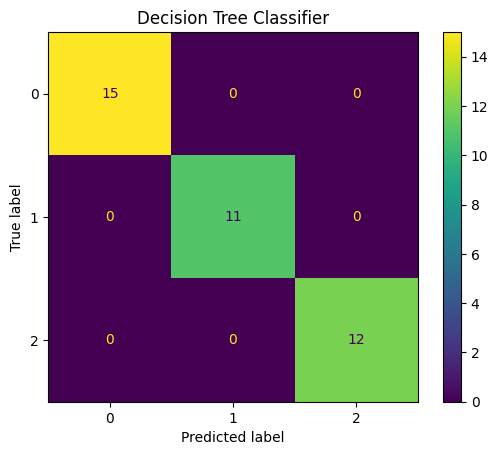

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt,x_test,y_test)
plt.title("Decision Tree Classifier")

plt.savefig("DT CM",dpi=300)
plt.show()

**************K-NEAREST NEIGHBOUR***************

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [21]:
knn.score(x_test,y_test)*100

100.0

In [22]:
knn.predict([[5.7,2.8,4.1,1.3]]),dt.predict([[5.0,3.6,1.4,0.2]])

C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(array([1]), array([0]))

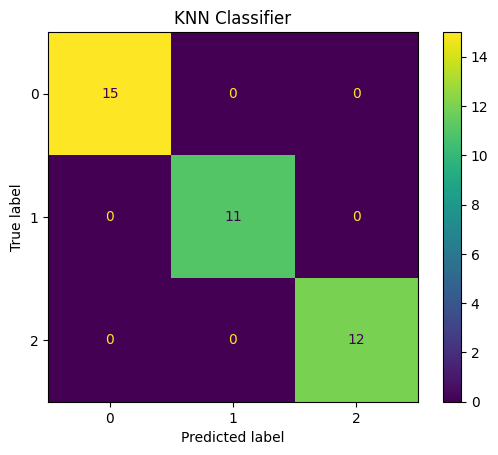

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn,x_test,y_test)
plt.title("KNN Classifier")

plt.savefig("KNN CM")
plt.show()

***************SUPPORT VECTOR MACHINE******************

In [24]:
from sklearn.svm import SVC

In [25]:
['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

In [40]:
svm_model = SVC(kernel="poly", random_state=42)
svm_model.fit(x_train,y_train)

SVC(kernel='poly', random_state=42)

In [41]:
svm_model.score(x_test,y_test)*100

100.0

In [42]:
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [43]:
svm_model.score(x_test,y_test)*100

100.0

In [48]:
d1.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Encode
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


VISUALIZATION


In [64]:
x1 = d1[['petal_length', 'petal_width']]

y1 = d1['Encode']

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=42)

In [66]:
svm_model1 = SVC(kernel="linear",random_state=42)
svm_model1.fit(x1,y1)

SVC(kernel='linear', random_state=42)

In [67]:
svm_model1.score(x_test,y_test)*100

100.0

In [68]:
from mlxtend.plotting import plot_decision_regions

C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

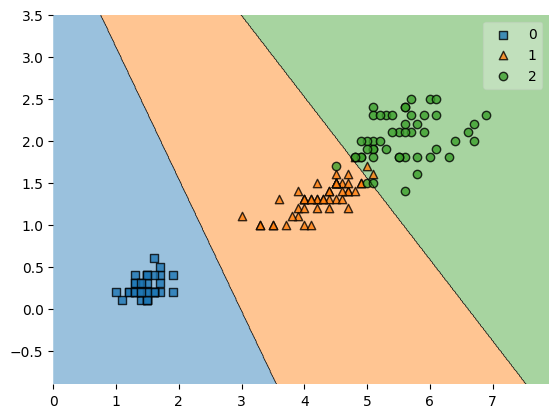

In [69]:
plot_decision_regions(x1.to_numpy(), y1.to_numpy(),clf=svm_model1)